In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Building DataFrames

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
games = pickle.load(open('games.pkl', 'rb'))

In [4]:
games2 = pickle.load(open('games2.pkl', 'rb'))

In [5]:
games2 = games2[10:]

In [6]:
len(games2)

463

In [7]:
len(games)

22631

In [8]:
for x in games2:
    games.append(x)

In [9]:
len(games)

23094

In [10]:
games_full = []
batting = []
pitching = []
pitchers = []

for g in games[:-10]:
    game_summary = g['game']
    game_summary['home_pitcher'] = g['home_pitchers'][0]['name']
    game_summary['away_pitcher'] = g['away_pitchers'][0]['name']
    game_summary['home_score'] = g['home_batting']['R']
    game_summary['away_score'] = g['away_batting']['R']
    games_full.append(game_summary)
    

In [11]:
games_df = pd.DataFrame(games_full).drop_duplicates()

In [12]:
for g in games:
    pairs = [
        ('away_batting', batting),
        ('home_batting', batting),
        ('away_pitching', pitching),
        ('home_pitching', pitching),
        ('away_pitchers',pitchers ),
        ('home_pitchers', pitchers)
    ]
    for key, d in pairs:
        if isinstance(g[key], list):
            for x in g[key]:
                if 'home' in key:
                    x['home?'] = True
                    x['team']=g['game']['home_abbr']
                else:
                    x['home?'] = False
                    x['team'] = g['game']['away_abbr']
                x['game_id'] = g['game']['game_id']
                d.append(x)
                
        else:
            x = g[key]
            if 'home' in key:
                x['home?'] = True
                x['team'] = g['game']['home_abbr']
            else:
                x['home?'] = False
                x['team'] = g['game']['away_abbr']
            x['game_id'] = g['game']['game_id']
            d.append(x)
                

In [13]:
batting = pd.DataFrame(batting).drop_duplicates()

In [14]:
games_df.shape

(20654, 9)

In [15]:
pitching = pd.DataFrame(pitching).drop_duplicates()

In [16]:
pitching.shape

(41328, 29)

In [17]:
pitchers = pd.DataFrame(pitchers).drop_duplicates()

In [18]:
batting.head()

,AB,R,H,RBI,BB,SO,PA,batting_avg,onbase_perc,slugging_perc,onbase_plus_slugging,pitches,strikes_total,wpa_bat,leverage_index_avg,wpa_bat_pos,wpa_bat_neg,cwpa_bat,cli_avg,re24_bat,PO,A,details,home?,team,game_id
0,33,3,7,2,2,10,35,.212,.257,.364,.621,125,83,-0.231,1.01,0.525,-0.756%,-0.14%,0.98,-1.8,24,7,,False,CHW,ANA202104010
1,30,4,6,4,4,10,34,.200,.294,.300,.594,140,92,0.266,1.68,1.072,-0.806%,0.15%,1.58,-0.3,27,10,,True,LAA,ANA202104010
2,35,5,9,5,11,10,47,.257,.447,.400,.847,214,122,0.172,1.05,0.985,-0.814%,0.11%,1.11,0.4,27,8,,False,PIT,CHN202104010
3,26,3,2,3,4,13,34,.077,.182,.154,.336,151,91,-0.329,1.24,0.409,-0.738%,-0.20%,1.26,-1.6,27,13,,True,CHC,CHN202104010
4,37,11,10,9,3,7,41,.270,.341,.486,.828,146,102,0.473,0.38,0.601,-0.128%,0.31%,0.41,5.8,27,4,,False,STL,CIN202104010


In [19]:
#games_df = games_df_temp[10:]

In [20]:
games_df.shape

(20654, 9)

In [21]:
games_df[['day', 'del1','del2','date']] = games_df['date'].str.extract('(\w+)(,)(\s+)(\w+\s+\d+\W+\s+\d+)', expand=True )
games_df = games_df.drop(columns = ['del1','del2'])

In [22]:
cond = (games_df['home_score']>games_df['away_score'], games_df['home_score']<games_df['away_score'])
choices = (True, False)
games_df['Home_win'] = np.select(cond, choices)

In [23]:
numeric_pitching = pitching.columns.to_list()[:-3]

In [24]:
for x in numeric_pitching:
    try:
        pitching[x] = pitching[x].astype(float)
    except ValueError:
        pass

In [25]:
pitching.dtypes

IP                    float64
H                     float64
R                     float64
ER                    float64
BB                    float64
SO                    float64
HR                    float64
earned_run_avg        float64
batters_faced         float64
pitches               float64
strikes_total         float64
strikes_contact       float64
strikes_swinging      float64
strikes_looking       float64
inplay_gb_total       float64
inplay_fb_total       float64
inplay_ld             float64
inplay_unk            float64
game_score            float64
inherited_runners      object
inherited_score        object
wpa_def               float64
leverage_index_avg    float64
cwpa_def               object
cli_avg               float64
re24_def              float64
home?                    bool
team                   object
game_id                object
dtype: object

In [26]:
batting.head()

,AB,R,H,RBI,BB,SO,PA,batting_avg,onbase_perc,slugging_perc,onbase_plus_slugging,pitches,strikes_total,wpa_bat,leverage_index_avg,wpa_bat_pos,wpa_bat_neg,cwpa_bat,cli_avg,re24_bat,PO,A,details,home?,team,game_id
0,33,3,7,2,2,10,35,.212,.257,.364,.621,125,83,-0.231,1.01,0.525,-0.756%,-0.14%,0.98,-1.8,24,7,,False,CHW,ANA202104010
1,30,4,6,4,4,10,34,.200,.294,.300,.594,140,92,0.266,1.68,1.072,-0.806%,0.15%,1.58,-0.3,27,10,,True,LAA,ANA202104010
2,35,5,9,5,11,10,47,.257,.447,.400,.847,214,122,0.172,1.05,0.985,-0.814%,0.11%,1.11,0.4,27,8,,False,PIT,CHN202104010
3,26,3,2,3,4,13,34,.077,.182,.154,.336,151,91,-0.329,1.24,0.409,-0.738%,-0.20%,1.26,-1.6,27,13,,True,CHC,CHN202104010
4,37,11,10,9,3,7,41,.270,.341,.486,.828,146,102,0.473,0.38,0.601,-0.128%,0.31%,0.41,5.8,27,4,,False,STL,CIN202104010


In [27]:
batting.dtypes

AB                      object
R                       object
H                       object
RBI                     object
BB                      object
SO                      object
PA                      object
batting_avg             object
onbase_perc             object
slugging_perc           object
onbase_plus_slugging    object
pitches                 object
strikes_total           object
wpa_bat                 object
leverage_index_avg      object
wpa_bat_pos             object
wpa_bat_neg             object
cwpa_bat                object
cli_avg                 object
re24_bat                object
PO                      object
A                       object
details                 object
home?                     bool
team                    object
game_id                 object
dtype: object

In [28]:
games_df[games_df.duplicated('game_id') == True]

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win


In [29]:
games_df['date'] = pd.to_datetime(games_df['date'])

In [30]:
games_df.head()

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win
0,ANA202104010,CHW,LAA,2021-04-01,Start Time: 7:05 p.m. Local,bundydy01,giolilu01,4,3,Thursday,1
1,CHN202104010,PIT,CHC,2021-04-01,Start Time: 1:20 p.m. Local,hendrky01,kuhlch01,3,5,Thursday,0
2,CIN202104010,STL,CIN,2021-04-01,Start Time: 4:10 p.m. Local,castilu02,flaheja01,6,11,Thursday,1
3,COL202104010,LAD,COL,2021-04-01,Start Time: 2:10 p.m. Local,marquge01,kershcl01,8,5,Thursday,1
4,DET202104010,CLE,DET,2021-04-01,Start Time: 1:10 p.m. Local,boydma01,biebesh01,3,2,Thursday,1


In [31]:
# games_df = games_df.sort_values(['away_abbr', 'date']).reset_index(drop=True)

In [32]:
games_df.dtypes

game_id                 object
away_abbr               object
home_abbr               object
date            datetime64[ns]
time                    object
home_pitcher            object
away_pitcher            object
home_score              object
away_score              object
day                     object
Home_win                 int32
dtype: object

In [33]:
games_df = games_df.sort_values('date')

In [34]:
games_df['consec_away'] = np.nan
for i in games_df.index[10:20]:
    if (games_df['away_abbr'][i-1]==games_df['away_abbr'][i] ) & ((games_df['date'][i] - games_df['date'][i-1]) == timedelta(days = 1)):
        games_df.at[i, 'consec_away'] = 1
        print(games_df['date'][i] - games_df['date'][i-1])
    elif(games_df['away_abbr'][i-1]==games_df['away_abbr'][i]) & (games_df['date'][i]==games_df['date'][i-1]):
        games_df.at[i,'consec_away'] =  1
    else:
        games_df.at[i,'consec_away'] = 0

In [35]:
games_df

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,consec_away
10,OAK201203280,SEA,OAK,2012-03-28,Start Time: 7:09 p.m. Local,mccarbr01,hernafe02,1,3,Wednesday,0,NaN
11,OAK201203290,SEA,OAK,2012-03-29,Start Time: 6:04 p.m. Local,colonba01,vargaja01,4,1,Thursday,1,NaN
12,MIA201204040,STL,MIA,2012-04-04,Start Time: 7:15 p.m. Local,johnsjo09,lohseky01,1,4,Wednesday,0,NaN
15,CLE201204050,TOR,CLE,2012-04-05,Start Time: 3:08 p.m. Local,masteju01,romerri01,4,7,Thursday,0,NaN
18,PIT201204050,PHI,PIT,2012-04-05,Start Time: 1:37 p.m. Local,bedarer01,hallaro01,0,1,Thursday,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23082,HOU202110030,OAK,HOU,2021-10-03,Start Time: 2:10 p.m. Local,urquijo01,irvinco01,7,6,Sunday,1,NaN
23079,ARI202110030,COL,ARI,2021-10-03,Start Time: 12:10 p.m. Local,mejiahu01,goudeas01,5,4,Sunday,1,NaN
23080,ATL202110030,NYM,ATL,2021-10-03,Start Time: 3:20 p.m. Local,mortoch02,syndeno01,5,0,Sunday,1,NaN
23081,CHA202110030,DET,CHW,2021-10-03,Start Time: 2:10 p.m. Local,ceasedy01,alexaty01,2,5,Sunday,0,NaN


In [36]:
pitchers.head()

,IP,H,R,ER,BB,SO,HR,earned_run_avg,batters_faced,pitches,strikes_total,strikes_contact,strikes_swinging,strikes_looking,inplay_gb_total,inplay_fb_total,inplay_ld,inplay_unk,game_score,inherited_runners,inherited_score,wpa_def,leverage_index_avg,cwpa_def,cli_avg,re24_def,name,home?,team,game_id
0,5.1,2,2,2,2,8,1,3.38,20,87,59,29,17,13,2,8,3,0,62,,,0.088,0.98,0.05%,0.95,0.9,giolilu01,False,CHW,ANA202104010
1,1.2,2,0,0,1,1,0,0.00,7,20,12,8,2,2,2,3,2,0,,0,0,0.160,1.82,0.09%,1.75,0.8,heuerco01,False,CHW,ANA202104010
2,0.2,2,2,0,1,1,0,0.00,6,28,18,9,5,4,4,0,0,0,,0,0,-0.552,3.60,-0.32%,3.47,-2.1,bummeaa01,False,CHW,ANA202104010
3,0.1,0,0,0,0,0,0,0.00,1,5,3,1,2,0,1,0,0,0,,2,0,0.037,1.22,0.02%,1.18,0.6,fostema01,False,CHW,ANA202104010
4,6,6,3,3,1,6,1,4.50,25,88,59,33,12,14,10,8,4,0,53,,,-0.051,0.94,-0.03%,0.88,0.2,bundydy01,True,LAA,ANA202104010


In [37]:
pitchers.dtypes

IP                    object
H                     object
R                     object
ER                    object
BB                    object
SO                    object
HR                    object
earned_run_avg        object
batters_faced         object
pitches               object
strikes_total         object
strikes_contact       object
strikes_swinging      object
strikes_looking       object
inplay_gb_total       object
inplay_fb_total       object
inplay_ld             object
inplay_unk            object
game_score            object
inherited_runners     object
inherited_score       object
wpa_def               object
leverage_index_avg    object
cwpa_def              object
cli_avg               object
re24_def              object
name                  object
home?                   bool
team                  object
game_id               object
dtype: object

In [38]:
numeric_pitchers = pitchers.columns.to_list()[:-4]

In [39]:
for x in numeric_pitchers:
    try:
        pitchers[x] = pitchers[x].astype(float)
    except ValueError:
        pass

In [40]:
pitchers.dtypes

IP                    float64
H                     float64
R                     float64
ER                    float64
BB                    float64
SO                    float64
HR                    float64
earned_run_avg         object
batters_faced         float64
pitches                object
strikes_total          object
strikes_contact        object
strikes_swinging       object
strikes_looking        object
inplay_gb_total        object
inplay_fb_total        object
inplay_ld              object
inplay_unk             object
game_score             object
inherited_runners      object
inherited_score        object
wpa_def                object
leverage_index_avg    float64
cwpa_def               object
cli_avg               float64
re24_def              float64
name                   object
home?                    bool
team                   object
game_id                object
dtype: object

# Looking at Stats

In [41]:
numeric_stats = ['AB', 'R', 'H', 'RBI',
                 'BB','SO', 'PA', 'batting_avg',
                 'onbase_perc','slugging_perc','onbase_plus_slugging',
                 'pitches', 'strikes_total', 'wpa_bat','leverage_index_avg']

In [42]:
for stat in numeric_stats:
    batting[stat] = batting[stat].astype(float)

In [43]:
team_batting = pd.DataFrame(batting.groupby('team')['R', 'SO', 'batting_avg', 'onbase_plus_slugging'].mean()).reset_index().rename(columns = {'team':'abbr'})

<ipython-input-43-6ca7f59342dd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_batting = pd.DataFrame(batting.groupby('team')['R', 'SO', 'batting_avg', 'onbase_plus_slugging'].mean()).reset_index().rename(columns = {'team':'abbr'})


In [44]:
home_wins = pd.DataFrame(games_df.groupby('home_abbr')['Home_win'].agg(['sum', 'count'])).reset_index()\
.rename(columns = {'home_abbr':'abbr'} )

In [45]:
away_wins = pd.DataFrame(games_df.groupby('away_abbr')['Home_win'].agg(['sum', 'count'])).reset_index()\
.rename(columns = {'away_abbr':'abbr'} )

In [46]:
away_wins['away_wins'] = away_wins['count'] - away_wins['sum']

In [47]:
total_wins = pd.merge(home_wins, away_wins, on = 'abbr').rename(columns = {'sum_x':'home_wins'})

In [48]:
total_wins['total_wins'] = total_wins['away_wins'] + total_wins['home_wins']
total_wins['total_games'] = total_wins['count_x'] + total_wins['count_y']

In [49]:
total_wins = total_wins.rename(columns={'count_x':'total_home_games', 'count_y':'total_away_games'})

In [50]:
wins_and_runs = pd.merge(total_wins, team_batting)

In [51]:
wins_and_runs.head()

,abbr,home_wins,total_home_games,sum_y,total_away_games,away_wins,total_wins,total_games,R,SO,batting_avg,onbase_plus_slugging
0,ARI,325,689,382,687,305,630,1376,4.476744,8.169331,0.247066,0.713155
1,ATL,375,685,363,690,327,702,1375,4.338909,8.053818,0.248026,0.708093
2,BAL,376,694,387,686,299,675,1380,4.404779,8.255612,0.245893,0.715504
3,BOS,367,688,346,688,342,709,1376,4.943355,7.803195,0.260018,0.746963
4,CHC,398,697,362,681,319,717,1378,4.426396,8.583756,0.242059,0.716142


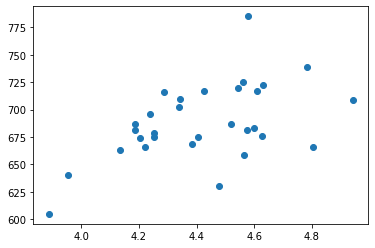

In [52]:
plt.scatter(x= wins_and_runs['R'], y = wins_and_runs['total_wins']);

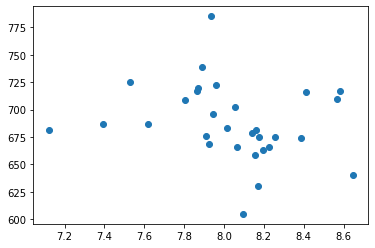

In [53]:
plt.scatter(x=wins_and_runs['SO'], y = wins_and_runs['total_wins']);

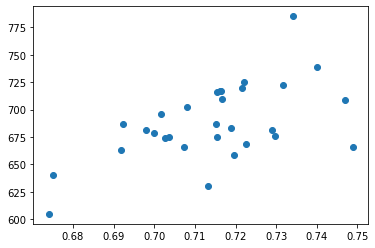

In [54]:
plt.scatter(x = wins_and_runs['onbase_plus_slugging'], y = wins_and_runs['total_wins']);

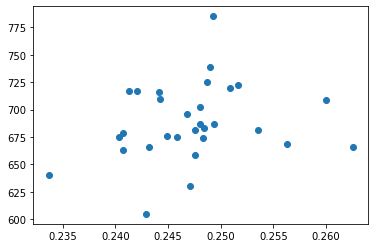

In [55]:
plt.scatter(x = wins_and_runs['batting_avg'], y = wins_and_runs['total_wins']);

In [56]:
# Runs per game important, OPS important, Strikeouts not as important- Trend Doesn't stand out

# Pitching

In [57]:
starters = pitchers.groupby(['team', 'game_id']).head(1)

In [58]:
starters = pd.merge(starters, games_df[['game_id','Home_win']]).drop_duplicates()

In [59]:
cond = ((starters['home?'] == True) & (starters['Home_win'] == 0),
       (starters['home?']==True)&(starters['Home_win']== 1),
       (starters['home?'] == False)&(starters['Home_win'] == 1),
       (starters['home?']==False)&(starters['Home_win']==0))

choices = ('L', 'W', 'L', 'W')

starters['Result?'] = np.select(cond, choices)

In [60]:
# starters['IP'] = starters['IP'].str.replace('.1', '.333')
# starters['IP'] = starters['IP'].str.replace('.1', '.667')

In [61]:
starters['IP'] = starters['IP'].astype(float)
starters['batters_faced'] = starters['batters_faced'].astype(float)
starters['SO'] = starters['SO'].astype(float)
starters['BB'] = starters['BB'].astype(float)
starters['earned_run_avg'] = starters['earned_run_avg'].astype(float)

In [62]:
starters[starters['IP']>0].groupby('Result?')['IP', 'batters_faced', 'BB'].mean()

<ipython-input-62-7018ae6c0962>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  starters[starters['IP']>0].groupby('Result?')['IP', 'batters_faced', 'BB'].mean()


,IP,batters_faced,BB
Result?,,,
L,5.218459,23.617349,1.906179
W,5.767841,24.030667,1.711206


In [63]:
starters.sort_values('IP')

,IP,H,R,ER,BB,SO,HR,earned_run_avg,batters_faced,pitches,strikes_total,strikes_contact,strikes_swinging,strikes_looking,inplay_gb_total,inplay_fb_total,inplay_ld,inplay_unk,game_score,inherited_runners,inherited_score,wpa_def,leverage_index_avg,cwpa_def,cli_avg,re24_def,name,home?,team,game_id,Home_win,Result?
24103,0.0,5.0,4.0,4.0,0.0,0.0,1.0,4.53,5.0,22,17,12,3,2,0,5,3,0,24,,,-0.346,0.91,-0.52%,2.29,-4.4,boydma01,True,DET,DET201609250,1,W
7067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.01,0.0,,,,,,,,,,50,,,,0.00,0.00%,0.00,0.0,richacl01,True,SDP,SDN201306210,1,W
5546,0.0,3.0,2.0,2.0,0.0,0.0,2.0,12.71,4.0,17,9,5,0,4,0,3,2,0,36,,,-0.260,0.79,-0.21%,1.05,-3.0,sanchjo01,False,PIT,SLN201304260,1,L
8275,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.89,1.0,2,1,1,0,0,0,1,1,0,48,,,-0.062,0.87,-0.04%,0.85,-0.6,millesh01,True,STL,SLN201308070,1,W
38974,0.0,3.0,5.0,5.0,3.0,0.0,0.0,inf,6.0,30,15,10,0,5,2,1,1,0,21,,,-0.365,1.45,-0.26%,1.74,-5.3,ohtansh01,False,LAA,OAK202007260,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,9.0,0.0,0.0,0.0,1.0,9.0,0.0,3.57,28.0,109,74,41,16,17,8,10,3,0,95,,,0.461,0.77,0.33%,0.92,4.0,baileho02,True,CIN,CIN201307020,1,W
12229,9.0,4.0,0.0,0.0,0.0,0.0,0.0,3.12,31.0,95,68,43,2,23,18,13,2,0,79,,,0.467,0.80,0.41%,1.16,4.2,porceri01,True,DET,DET201407010,1,W
11079,9.0,1.0,0.0,0.0,0.0,9.0,0.0,1.85,28.0,115,86,53,7,26,9,10,2,0,94,,,0.290,0.47,0.21%,0.56,4.0,wainwad01,True,STL,SLN201405200,1,W
5671,9.0,3.0,2.0,2.0,1.0,12.0,2.0,3.34,32.0,114,80,41,14,25,9,10,1,0,84,,,0.235,0.38,0.08%,0.23,2.1,feldmsc01,True,CHC,CHN201305010,1,W


In [64]:
# Winning teams tend to have starters that only go 2 thirds longer of the game longer

In [65]:
cond1 = (starters['Result?'] == 'W',  starters['Result?']== 'L')
choice1 = (True, False)

starters['winner'] = np.select(cond1, choice1)

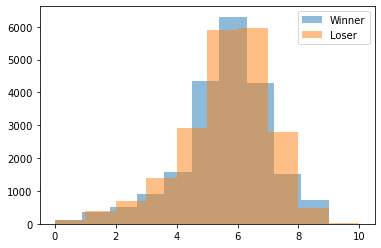

In [66]:
plt.hist(starters[starters['Result?'] == 'W']['IP'], alpha = 0.5, label = 'Winner')
plt.hist(starters[starters['Result?'] == 'L']['IP'], alpha = 0.5, label = 'Loser')
plt.legend();

In [67]:
#Not Much here. it looks like WInners are slightly more spread out than losers

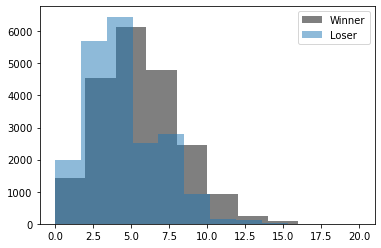

In [68]:
plt.hist(starters[starters['Result?'] == 'W']['SO'], alpha = 0.5, color='black',label = 'Winner')
plt.hist(starters[starters['Result?'] == 'L']['SO'], alpha = 0.5, label = 'Loser')
plt.legend();

In [69]:
# Starting Pitchers of winning teams tend to have more strikeouts

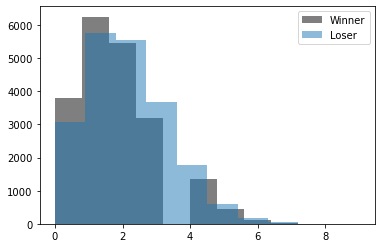

In [70]:
plt.hist(starters[starters['Result?'] == 'W']['BB'], alpha = 0.5, color='black',label = 'Winner')
plt.hist(starters[starters['Result?'] == 'L']['BB'], alpha = 0.5, label = 'Loser')
plt.legend();

In [71]:
# Starting Pitchers tend to have fewer walks, but not by much.

# League Trends

In [72]:
total_wins.head() 

,abbr,home_wins,total_home_games,sum_y,total_away_games,away_wins,total_wins,total_games
0,ARI,325,689,382,687,305,630,1376
1,ATL,375,685,363,690,327,702,1375
2,BAL,376,694,387,686,299,675,1380
3,BOS,367,688,346,688,342,709,1376
4,CHC,398,697,362,681,319,717,1378


In [73]:
total_wins['away_win_pct'] = total_wins['away_wins']/total_wins['total_away_games']
total_wins['home_win_pct'] = (total_wins['home_wins']/total_wins['total_home_games'])

In [74]:
print(f"league wide home win %: {total_wins['home_wins'].sum()/total_wins['total_home_games'].sum()}")
print(f"league wide away win %: {total_wins['away_wins'].sum()/total_wins['total_away_games'].sum()}")

league wide home win %: 0.5385397501694587
league wide away win %: 0.4614602498305413


In [75]:
# There is a significantly higher winning percentage on the road vs at home.

# Building Training Data

In [89]:
def rolling_stats(period, df, stat_col):
    for s in stat_col:
        #if 'object' in str(df[s].dtype): continue
        df[s+'_'+str(period)+'_Avg'] = df.groupby('team')[s].apply(lambda x: x.rolling(period).mean())
    return df


def get_diff_df(df, name, is_pitcher = False):
    df['date'] = pd.to_datetime(df['game_id'].str[3:-1], format='%Y%m%d')
    df = df.sort_values('date').copy()
    newindex = df.groupby('date')['date'].apply(lambda x: x + np.arange(x.size).astype(np.timedelta64))
    df = df.set_index(newindex)
    stat_columns = [x for x in df.columns if 'float' in str(df[x].dtype)]
    
    df = rolling_stats('5d', df, stat_columns)
    df = rolling_stats('10d', df, stat_columns)
    df = rolling_stats('45d', df, stat_columns)
    df = rolling_stats('180d', df, stat_columns)
    
    df = df.reset_index(drop = True)
    df = df.sort_values('date')
    
    for s in stat_columns:
        if is_pitcher == True:
            df[s] = df.groupby('name')[s].shift(1)
        else:
            df[s] = df.groupby('team')[s].shift(1)
            
    away_df = df[df['home?'] == False].copy()
    away_df = away_df.set_index('game_id')
    away_df = away_df[stat_columns]
    
    home_df = df[df['home?'] == True].copy()
    home_df = home_df.set_index('game_id')
    home_df = home_df[stat_columns]
    
    diff = home_df.subtract(away_df, fill_value = 0)
    diff = diff.reset_index()
    
    for s in stat_columns:
        colname = str(name + '_' + s)
        diff[colname] = diff[s]
        diff.drop(columns = s, inplace = True)
        
    return diff



In [99]:
df = games_df

In [100]:
df = pd.merge(left = df, right = get_diff_df(batting, 'batting'), on ='game_id', how = 'left')

In [101]:
df.head()

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,consec_away,batting_AB,batting_R,batting_H,batting_RBI,batting_BB,batting_SO,batting_PA,batting_batting_avg,batting_onbase_perc,batting_slugging_perc,batting_onbase_plus_slugging,batting_pitches,batting_strikes_total,batting_wpa_bat,batting_leverage_index_avg
0,OAK201203280,SEA,OAK,2012-03-28,Start Time: 7:09 p.m. Local,mccarbr01,hernafe02,1,3,Wednesday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OAK201203290,SEA,OAK,2012-03-29,Start Time: 6:04 p.m. Local,colonba01,vargaja01,4,1,Thursday,1,NaN,0.0,-2.0,-3.0,-2.0,0.0,6.0,1.0,-0.077,-0.036,-0.102,-0.138,7.0,-2.0,-0.5,0.16
2,MIA201204040,STL,MIA,2012-04-04,Start Time: 7:15 p.m. Local,johnsjo09,lohseky01,1,4,Wednesday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CLE201204050,TOR,CLE,2012-04-05,Start Time: 3:08 p.m. Local,masteju01,romerri01,4,7,Thursday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PIT201204050,PHI,PIT,2012-04-05,Start Time: 1:37 p.m. Local,bedarer01,hallaro01,0,1,Thursday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([   6.,   39.,  241., 1160., 3657., 4437., 1247.,  267.,   55.,
           7.]),
 array([-21. , -16.8, -12.6,  -8.4,  -4.2,   0. ,   4.2,   8.4,  12.6,
         16.8,  21. ]),
 <BarContainer object of 10 artists>)

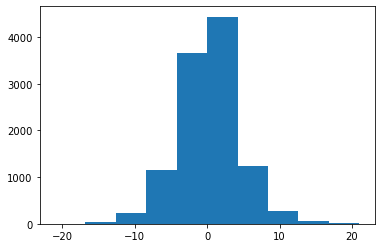

In [102]:
plt.hist(df[df['Home_win'] == 1].batting_R)

In [103]:
# Distribution of Run Differences before a win looks relatively normal

(array([  20.,  149.,  639., 1809., 2867., 2879., 1832.,  724.,  173.,
          24.]),
 array([-0.392 , -0.3128, -0.2336, -0.1544, -0.0752,  0.004 ,  0.0832,
         0.1624,  0.2416,  0.3208,  0.4   ]),
 <BarContainer object of 10 artists>)

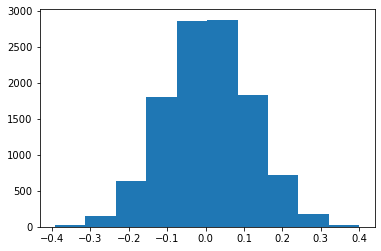

In [104]:
plt.hist(df[df['Home_win'] == 1].batting_batting_avg)

In [105]:
# Dist of batting average is almost perfectly normal

In [ ]:
# Rolling averages are going to be important because of this.